# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define your API key (you need to sign up on OpenWeatherMap to get the API key)
api_key = "ce31f25ce43de3196e1f962d438fd2e3"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | noosa heads
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | at taj
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | titusville
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | znamenskoye
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | kuta
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | treinta y tres
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | 

Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 41 of Set 4 | bozhou
Processing Record 42 of Set 4 | kolokani
Processing Record 43 of Set 4 | nantucket
Processing Record 44 of Set 4 | staryye ozinki
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | sarangani
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | madimba
Processing Record 49 of Set 4 | misratah
Processing Record 0 of Set 5 | gadzhiyevo
Processing Record 1 of Set 5 | nago
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | sisimiut
Processing Record 4 of Set 5 | port mathurin
Processing Record 5 of Set 5 | turpan
Processing Record 6 of Set 5 | yuzhno-kurilsk
Processing Record 7 of Set 5 | lerwick
Processing Record 8 of Set 5 | papatowai
Processing Record 9 of Set 5 | port alfred
Processing Record 10 of Set 5 | kailua-kona
Processing Record 11 of Set 5 | portales
Processing R

Processing Record 33 of Set 8 | shimanovsk
Processing Record 34 of Set 8 | vila velha
Processing Record 35 of Set 8 | vityazevo
Processing Record 36 of Set 8 | kruisfontein
Processing Record 37 of Set 8 | antofagasta
Processing Record 38 of Set 8 | fauske
Processing Record 39 of Set 8 | fada n'gourma
Processing Record 40 of Set 8 | aral
Processing Record 41 of Set 8 | tera
Processing Record 42 of Set 8 | ghanzi
Processing Record 43 of Set 8 | bandarbeyla
Processing Record 44 of Set 8 | kupang
Processing Record 45 of Set 8 | zaozersk
Processing Record 46 of Set 8 | sausset-les-pins
Processing Record 47 of Set 8 | utete
Processing Record 48 of Set 8 | zungeru
Processing Record 49 of Set 8 | silute
Processing Record 0 of Set 9 | sao tome
Processing Record 1 of Set 9 | chibougamau
Processing Record 2 of Set 9 | kavieng
Processing Record 3 of Set 9 | la villa del rosario
Processing Record 4 of Set 9 | yayva
Processing Record 5 of Set 9 | kirakira
Processing Record 6 of Set 9 | al majaridah


Processing Record 24 of Set 12 | yamba
Processing Record 25 of Set 12 | taoudenni
Processing Record 26 of Set 12 | sarkand
Processing Record 27 of Set 12 | hami
Processing Record 28 of Set 12 | tete
Processing Record 29 of Set 12 | san ignacio
Processing Record 30 of Set 12 | bang len
Processing Record 31 of Set 12 | praia da vitoria
Processing Record 32 of Set 12 | salalah
Processing Record 33 of Set 12 | xianning
Processing Record 34 of Set 12 | al kharijah
Processing Record 35 of Set 12 | alice springs
Processing Record 36 of Set 12 | dunbar
Processing Record 37 of Set 12 | muisne
Processing Record 38 of Set 12 | abu tij
Processing Record 39 of Set 12 | chernyshevskiy
Processing Record 40 of Set 12 | cuamba
Processing Record 41 of Set 12 | macae
Processing Record 42 of Set 12 | fatwa
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,275.81,74,99,6.17,TF,1697600523
1,grytviken,-54.2811,-36.5092,275.19,87,72,5.14,GS,1697600523
2,bilibino,68.0546,166.4372,258.13,99,99,1.42,RU,1697600523
3,iqaluit,63.7506,-68.5145,272.00,58,100,1.03,CA,1697600523
4,noosa heads,-26.3833,153.1500,295.99,65,97,8.67,AU,1697600523


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.81,74,99,6.17,TF,1697600523
1,grytviken,-54.2811,-36.5092,275.19,87,72,5.14,GS,1697600523
2,bilibino,68.0546,166.4372,258.13,99,99,1.42,RU,1697600523
3,iqaluit,63.7506,-68.5145,272.00,58,100,1.03,CA,1697600523
4,noosa heads,-26.3833,153.1500,295.99,65,97,8.67,AU,1697600523


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

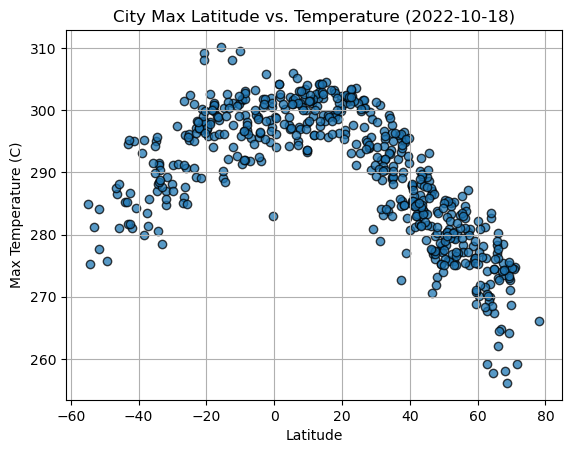

In [9]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

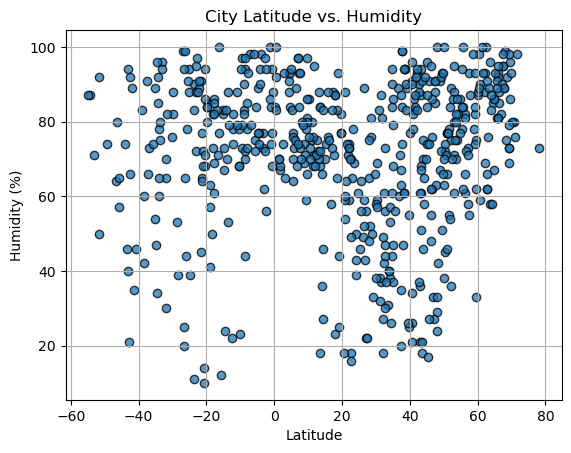

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

#### Latitude vs. Wind Speed Plot

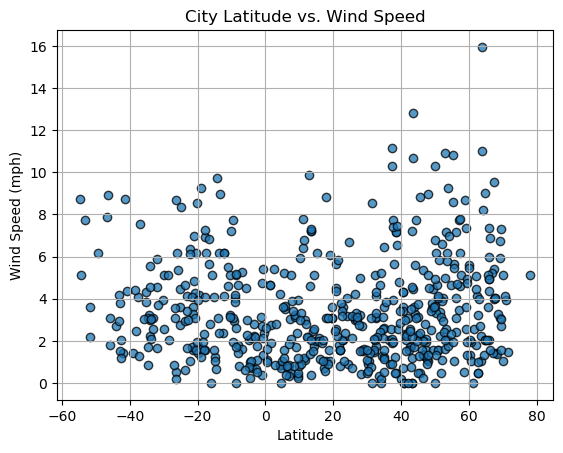

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bilibino,68.0546,166.4372,258.13,99,99,1.42,RU,1697600523
3,iqaluit,63.7506,-68.5145,272.00,58,100,1.03,CA,1697600523
6,at taj,24.2049,23.2857,291.09,43,4,3.16,LY,1697600524
8,sitka,57.0531,-135.3300,287.09,58,100,7.72,US,1697600524
9,titusville,28.6122,-80.8075,290.37,81,0,1.54,US,1697600423


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.81,74,99,6.17,TF,1697600523
1,grytviken,-54.2811,-36.5092,275.19,87,72,5.14,GS,1697600523
4,noosa heads,-26.3833,153.1500,295.99,65,97,8.67,AU,1697600523
5,waitangi,-43.9535,-176.5597,285.27,74,27,2.68,NZ,1697600416
7,margaret river,-33.9500,115.0667,291.44,60,26,5.53,AU,1697600237


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8905106825759601


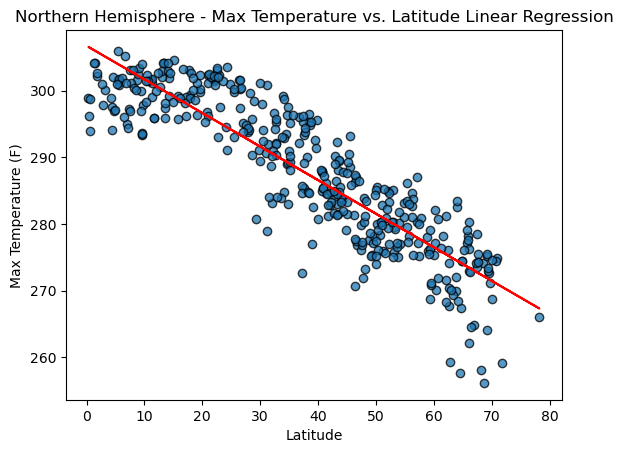

In [16]:
# Perform linear regression on Northern Hemisphere for Temperature vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create regression equation string
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate plot with regression equation
plt.annotate(equation, (0, 0), fontsize=15, color="red")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")

# Print r-value
print(f"The r-value is: {r_value}")

# Show plot
plt.show()


The r-value is: 0.6778118299133217


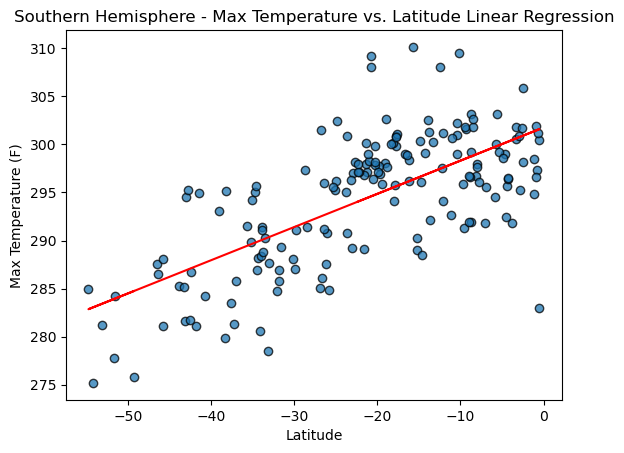

In [17]:
# Perform linear regression on Southern Hemisphere for Temperature vs. Latitude
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope_southern, intercept_southern, r_value_southern, _, _) = linregress(x_values_southern, y_values_southern)

# Calculate regression values
regress_values_southern = x_values_southern * slope_southern + intercept_southern

# Create regression equation string
equation_southern = f"y = {round(slope_southern, 2)}x + {round(intercept_southern, 2)}"

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern, edgecolors="black", alpha=0.75)

# Plot regression line
plt.plot(x_values_southern, regress_values_southern, "r-")

# Annotate plot with regression equation and r-value
plt.annotate(f"{equation_southern}\nR² = {round(r_value_southern**2, 2)}", (-55, 90), fontsize=15, color="red")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")

# Print r-value
print(f"The r-value is: {r_value_southern}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1462165490029317


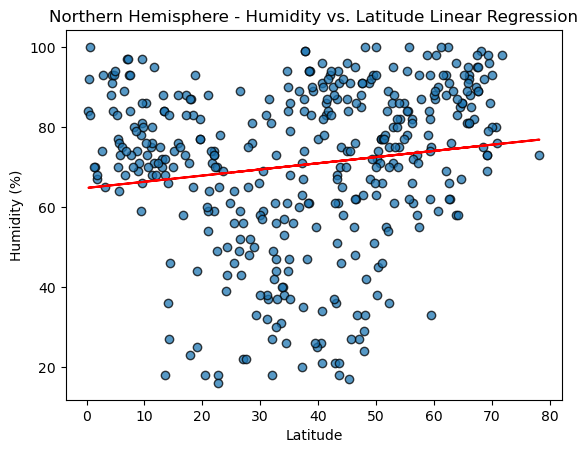

In [18]:
# Perform linear regression on Northern Hemisphere for Humidity vs. Latitude
x_values_northern_humidity = northern_hemi_df["Lat"]
y_values_northern_humidity = northern_hemi_df["Humidity"]

# Perform linear regression
(slope_northern_humidity, intercept_northern_humidity, r_value_northern_humidity, _, _) = linregress(x_values_northern_humidity, y_values_northern_humidity)

# Calculate regression values
regress_values_northern_humidity = x_values_northern_humidity * slope_northern_humidity + intercept_northern_humidity

# Create regression equation string
equation_northern_humidity = f"y = {round(slope_northern_humidity, 2)}x + {round(intercept_northern_humidity, 2)}"

# Create scatter plot
plt.scatter(x_values_northern_humidity, y_values_northern_humidity, edgecolors="black", alpha=0.75)

# Plot regression line
plt.plot(x_values_northern_humidity, regress_values_northern_humidity, "r-")

# Annotate plot with regression equation and r-value
plt.annotate(f"{equation_northern_humidity}\nR² = {round(r_value_northern_humidity**2, 2)}", (45, 10), fontsize=15, color="red")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Print r-value
print(f"The r-value is: {r_value_northern_humidity}")

# Show plot
plt.show()


In [19]:
# Define the regression equation
slope_southern_humidity = 0.03
intercept_southern_humidity = 70.73

# Create regression equation string
equation_southern_humidity = f"y = {slope_southern_humidity}x + {intercept_southern_humidity}"

# Create scatter plot
plt.scatter(x_values_southern_humidity, y_values_southern_humidity, edgecolors="black", alpha=0.75)

# Plot regression line with the specified equation
regress_values_southern_humidity = x_values_southern_humidity * slope_southern_humidity + intercept_southern_humidity
plt.plot(x_values_southern_humidity, regress_values_southern_humidity, "r-")

# Annotate plot with the specified regression equation
plt.annotate(equation_southern_humidity, (-50, 20), fontsize=15, color="red")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Show plot
plt.show()


NameError: name 'x_values_southern_humidity' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [20]:
# Define the regression equation
slope_northern_cloudiness = 0.31
intercept_northern_cloudiness = 48.5

# Create regression equation string
equation_northern_cloudiness = f"y = {slope_northern_cloudiness}x + {intercept_northern_cloudiness}"

# Create scatter plot
plt.scatter(x_values_northern_cloudiness, y_values_northern_cloudiness, edgecolors="black", alpha=0.75)

# Plot regression line with the specified equation
regress_values_northern_cloudiness = x_values_northern_cloudiness * slope_northern_cloudiness + intercept_northern_cloudiness
plt.plot(x_values_northern_cloudiness, regress_values_northern_cloudiness, "r-")

# Annotate plot with the specified regression equation
plt.annotate(equation_northern_cloudiness, (40, 50), fontsize=15, color="red")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Show plot
plt.show()


NameError: name 'x_values_northern_cloudiness' is not defined

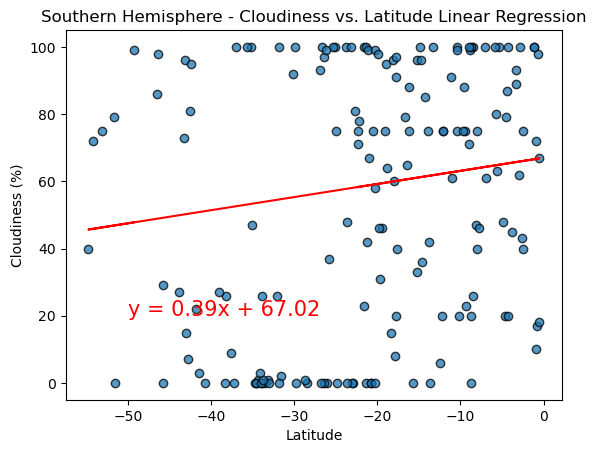

In [21]:
x_values_southern_cloudiness = southern_hemi_df['Lat']
y_values_southern_cloudiness = southern_hemi_df['Cloudiness']


# Define the regression equation
slope_southern_cloudiness = 0.39
intercept_southern_cloudiness = 67.02

# Step 3: Plot the scatter plot and regression line
plt.scatter(x_values_southern_cloudiness, y_values_southern_cloudiness, edgecolors="black", alpha=0.75)
regress_values_southern_cloudiness = x_values_southern_cloudiness * slope_southern_cloudiness + intercept_southern_cloudiness
plt.plot(x_values_southern_cloudiness, regress_values_southern_cloudiness, "r-")

# Annotate plot with regression equation
equation_southern_cloudiness = f"y = {slope_southern_cloudiness}x + {intercept_southern_cloudiness}"
plt.annotate(equation_southern_cloudiness, (-50, 20), fontsize=15, color="red")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

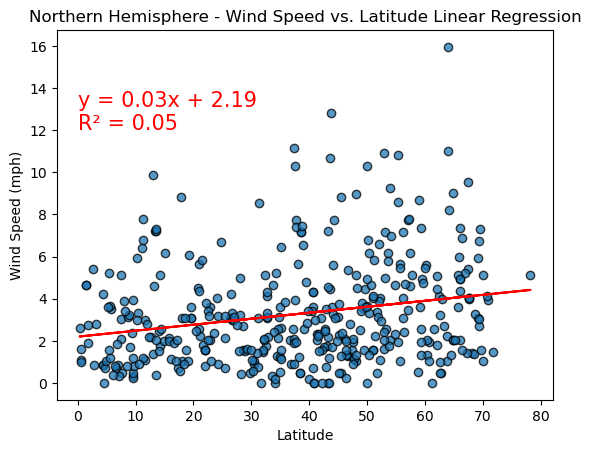

In [22]:

x_values_northern_wind = northern_hemi_df['Lat']
y_values_northern_wind = northern_hemi_df['Wind Speed']

# Step 2: Perform linear regression
(slope_northern_wind, intercept_northern_wind, r_value_northern_wind, _, _) = linregress(x_values_northern_wind, y_values_northern_wind)

# Step 3: Plot the scatter plot and regression line
plt.scatter(x_values_northern_wind, y_values_northern_wind, edgecolors="black", alpha=0.75)
regress_values_northern_wind = x_values_northern_wind * slope_northern_wind + intercept_northern_wind
plt.plot(x_values_northern_wind, regress_values_northern_wind, "r-")

# Annotate plot with regression equation and r-value
equation_northern_wind = f"y = {round(slope_northern_wind, 2)}x + {round(intercept_northern_wind, 2)}"
plt.annotate(f"{equation_northern_wind}\nR² = {round(r_value_northern_wind**2, 2)}", (0, 12), fontsize=15, color="red")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Show plot
plt.show()


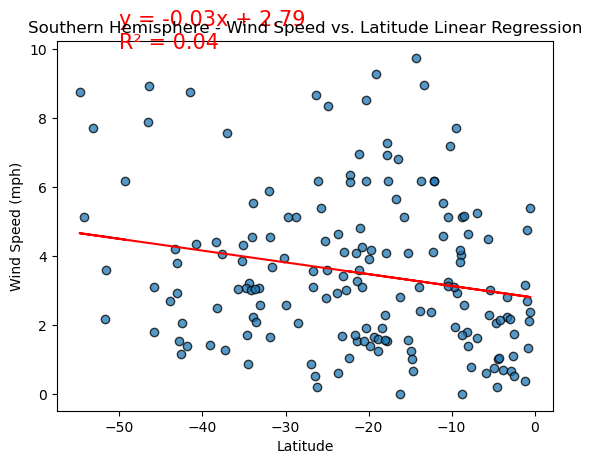

In [23]:
x_values_southern_wind = southern_hemi_df['Lat']
y_values_southern_wind = southern_hemi_df['Wind Speed']


# Step 2: Perform linear regression
(slope_southern_wind, intercept_southern_wind, r_value_southern_wind, _, _) = linregress(x_values_southern_wind, y_values_southern_wind)

# Step 3: Plot the scatter plot and regression line
plt.scatter(x_values_southern_wind, y_values_southern_wind, edgecolors="black", alpha=0.75)
regress_values_southern_wind = x_values_southern_wind * slope_southern_wind + intercept_southern_wind
plt.plot(x_values_southern_wind, regress_values_southern_wind, "r-")

# Annotate plot with regression equation and r-value
equation_southern_wind = f"y = {round(slope_southern_wind, 2)}x + {round(intercept_southern_wind, 2)}"
plt.annotate(f"{equation_southern_wind}\nR² = {round(r_value_southern_wind**2, 2)}", (-50, 10), fontsize=15, color="red")

# Incorporate other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE